In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_file = 'star_classification.csv'
df = pd.read_csv(data_file)
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
value = df['class'].value_counts()

In [ ]:
name = df['class'].unique()

<BarContainer object of 3 artists>

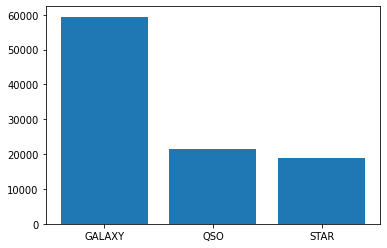

In [ ]:
plt.bar(name, value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

The dataset seems to be pretty clear and we do not have to deal with no null values

In [ ]:
X = df.drop(['class','obj_ID'], axis = 1)
Y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(90000, 16)

In [ ]:
X_test.shape

(10000, 16)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.5904

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(X_test, y_test)

0.9637

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clfs = RandomForestClassifier(n_estimators=100)

In [ ]:
clfs.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clfs.score(X_test, y_test)

0.9786

In [ ]:
from sklearn import svm


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)